In [1]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("data/parkinsons.csv")

In [4]:
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [5]:
# checking for null values
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
numcols = data.dtypes[(data.dtypes=='float64')].index

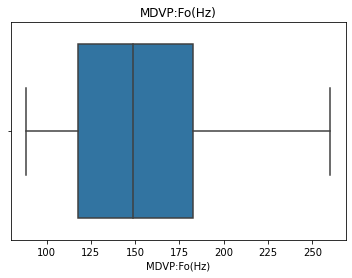

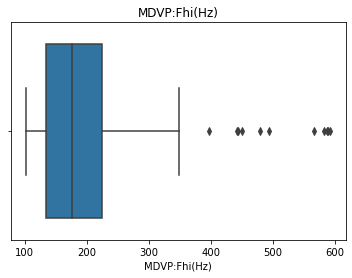

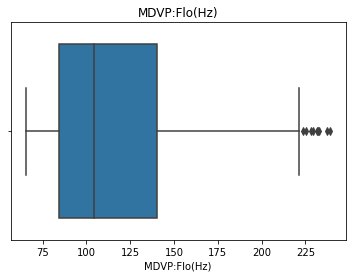

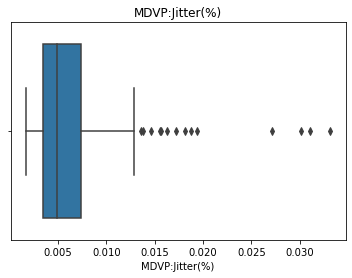

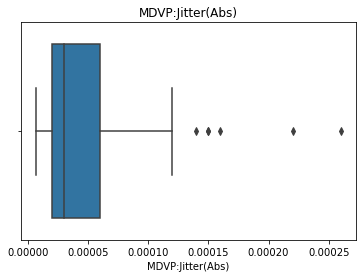

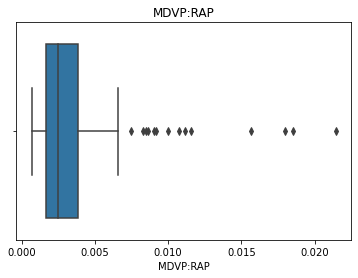

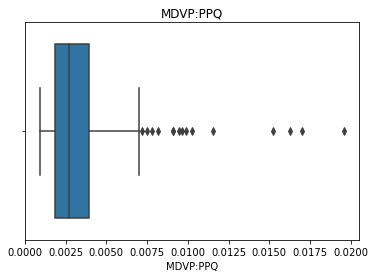

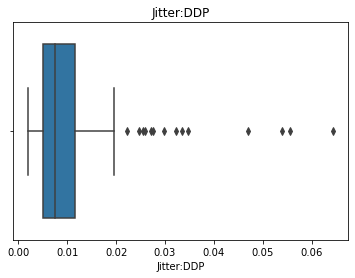

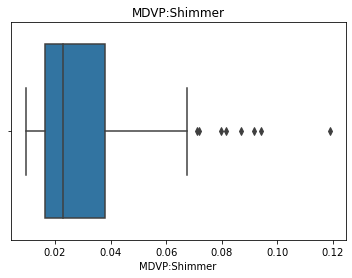

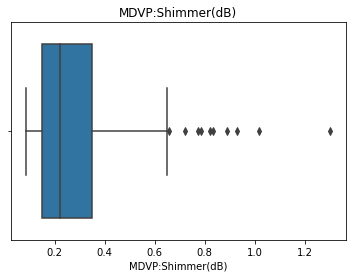

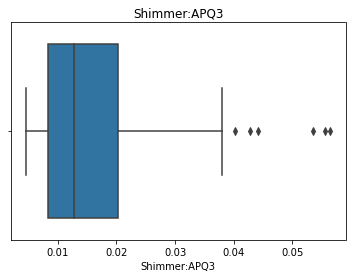

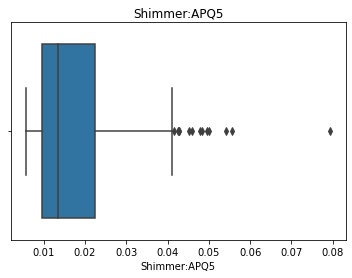

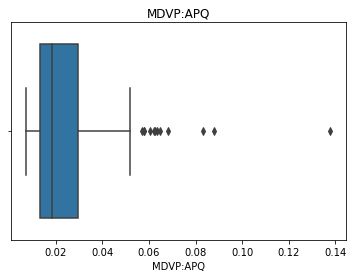

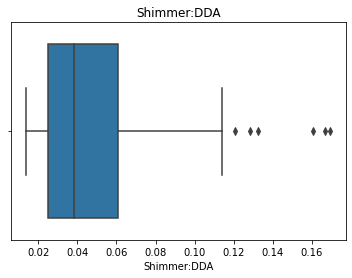

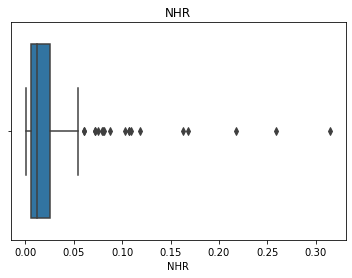

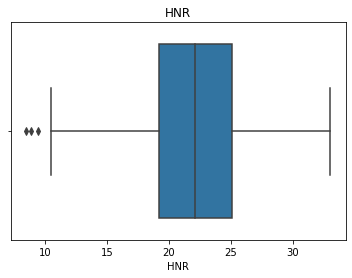

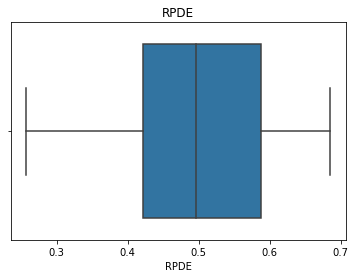

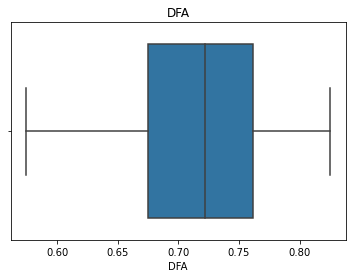

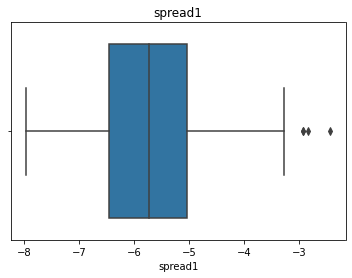

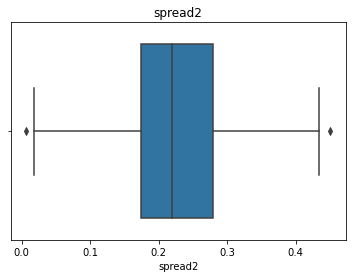

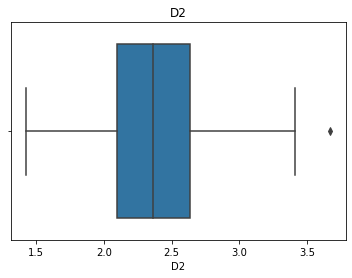

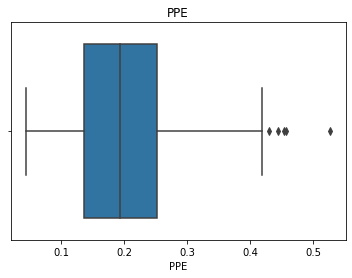

In [7]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [8]:
for x in numcols:
    print(x)
    descr = data[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    data[x][data[x]>upper_limit] = upper_limit
    data[x][data[x]<lower_limit] = lower_limit

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE


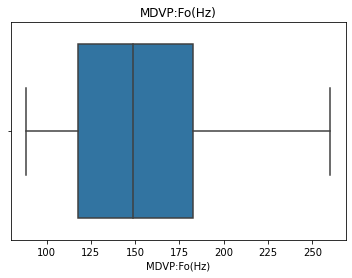

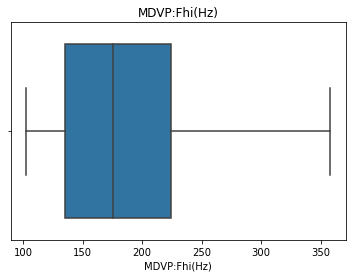

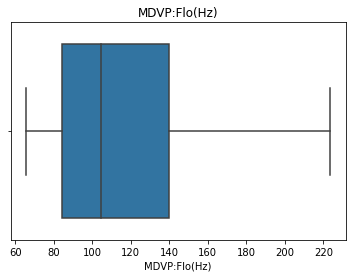

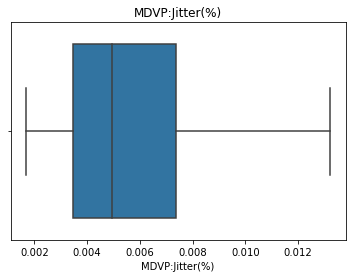

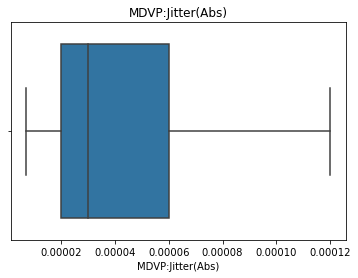

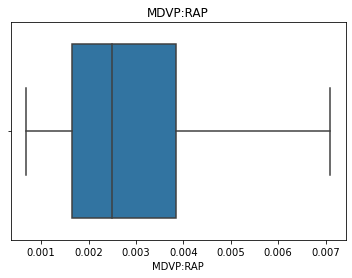

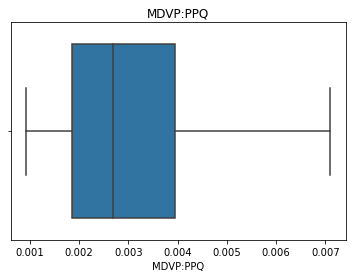

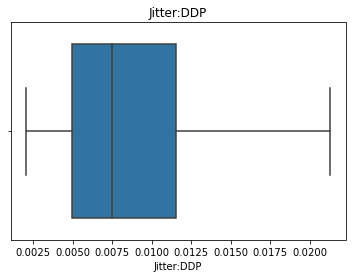

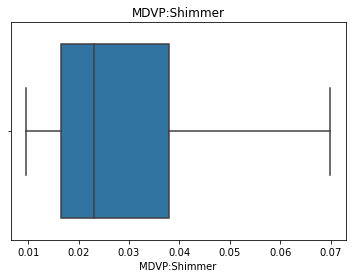

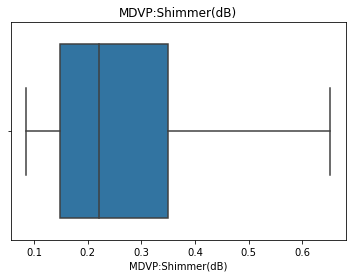

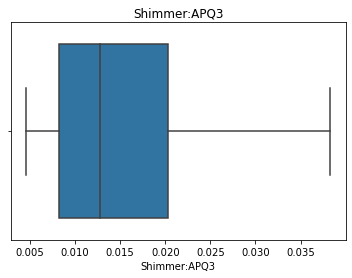

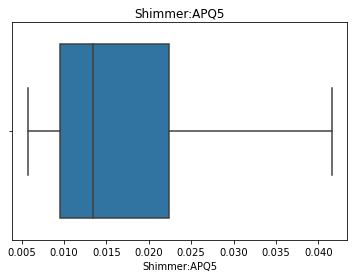

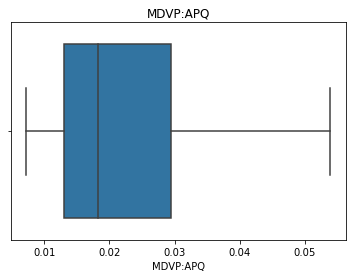

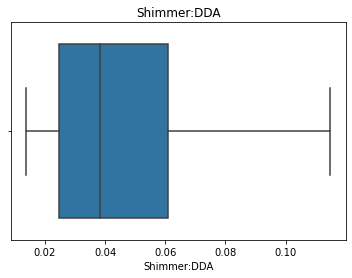

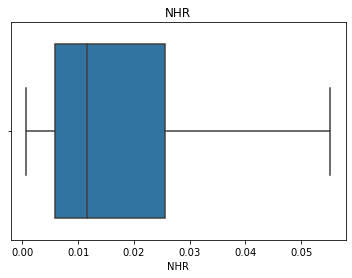

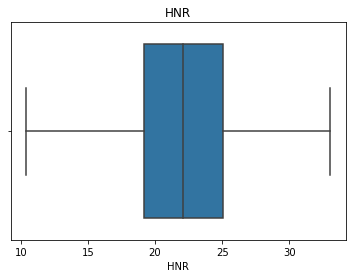

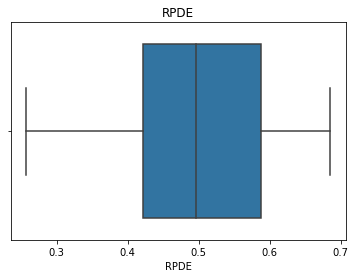

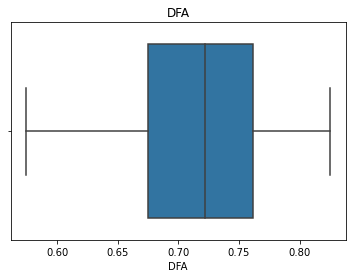

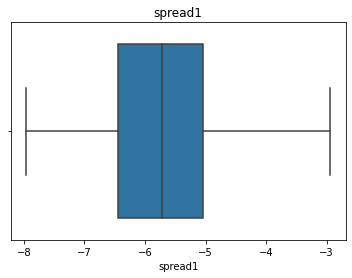

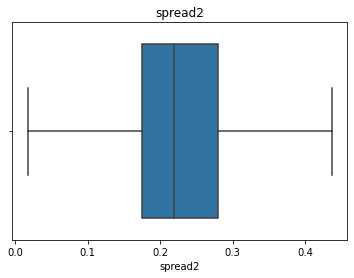

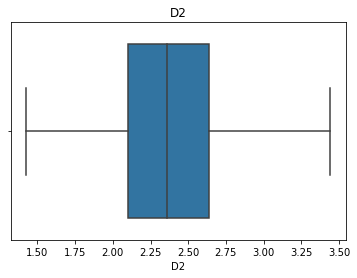

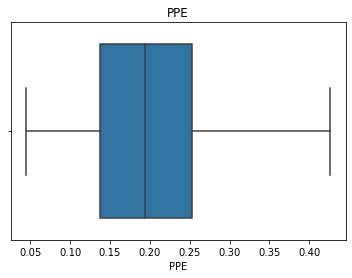

In [9]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [10]:
data['status'].unique()

array([1, 0])

In [11]:
data.drop(['name'], axis=1, inplace=True)

In [12]:
y = data['status']
X = data.drop('status',axis=1)

In [13]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,random_state=50)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
classifier=LogisticRegression() 
classifier.fit(X_train,y_train)

LogisticRegression()

In [16]:
ypred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.8769230769230769

In [18]:
classifier.score(X_test,y_test)

0.8769230769230769

In [19]:
classifier.score(X_train,y_train)

0.8769230769230769

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test,ypred)

array([[ 6,  8],
       [ 0, 51]])

In [22]:
accuracy = (6+51) /(6+51+8)
accuracy

0.8769230769230769